## Need to Correctify ##

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (7,4)

1000


(array([  25.,   49.,   80.,  160.,  139.,  177.,  157.,  102.,   87.,   24.]),
 array([ -3.072762 ,  -1.2134267,   0.6459086,   2.5052439,   4.3645792,
          6.2239145,   8.0832498,   9.9425851,  11.8019204,  13.6612557,
         15.520591 ]),
 <a list of 10 Patch objects>)

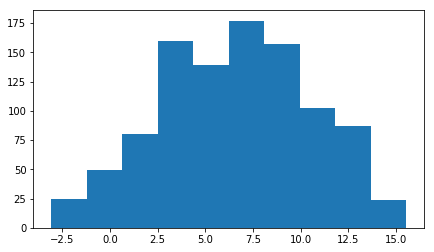

In [2]:
## Question 1 Part 1
train = pd.read_csv('./A3_EM_dataset/P1M1L2.txt',skiprows=0, header=None)
    
print(len(train))
X_train = train.values[:,0]
#y_train = train.values[:,1]
N = len(X_train)
K = 4

mu = np.average(X_train)
var = np.var(X_train)
sig = np.sqrt(var)

plt.figure
plt.hist(X_train)

### Can do simply by using sklearn.mixture.GaussianMixture or write the EM algorithm by self. 

var [2, 2, 2, 2] pi [0.1, 0.3, 0.4, 0.2] u [0, 4, 8, 12]


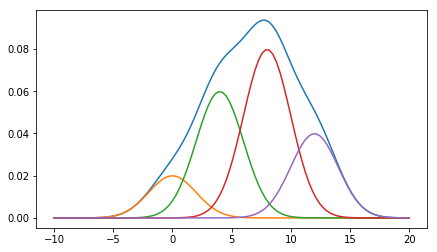

In [3]:
# Randomly setting initial Values of parameters
#np.random.seed(13572)
eps = 1e-5
lk = []
u = np.random.rand(K)
u = [0,4,8,12]


var = np.random.rand(K)
var = [2,2,2,2]

pi = eps + np.random.rand(K)
pi = [0.25,0.25,0.25,0.25]
pi = [0.1,0.3,0.4,0.2]

print('var',var,'pi', pi,'u', u)

# Checking for functional norm workings
x = np.linspace(-10,20,100)
z = []
kk = []
for i in x:
    z.append(np.sum(pi* norm.pdf(i, loc=u,scale=var) ) )
    kk.append(pi*norm.pdf(i, loc=u,scale=var))
plt.plot(x,z)
#plt.figure()
plt.plot(x,kk)

## Log likelihood
\begin{equation}
ln p(X| \mu, \sum, \pi) = \sum_{n=1}^{N}ln\{\sum_{k=1}^{K}\pi_k N(x_n|\mu_k,\sum_k)\}
\end{equation}

N [ 105.68274654  296.01728945  364.85448238  233.44548163]
[ 6.58537065  6.58590568  6.58600655  6.58663482]
True
u [ 6.58537065  6.58590568  6.58600655  6.58663482]
var True [ 15.67998312  15.68181309  15.68170834  15.67809324]
pi True [ 0.10568275  0.29601729  0.36485448  0.23344548]


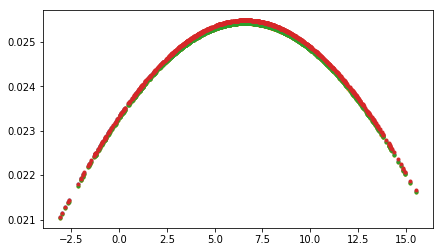

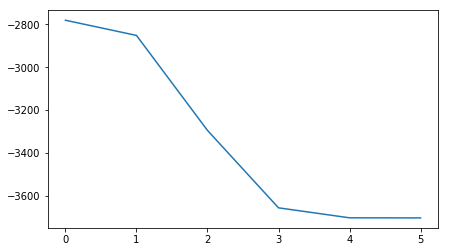

In [9]:
def plotting(X_train, u, var, lk):
    z = []
    for i in X_train:
        z.append(norm.pdf(i, loc=u,scale=var))

    plt.figure(figsize=(7,4))
    plt.plot(X_train,z,'.')
    
plotting(X_train, u, var,lk)

def loglikelihood(X_train, var, pi, u):
    l =0
    for n in range(len(X_train)):
        l += np.log(np.sum(pi*(norm.pdf(X_train[n],loc=u,scale=var) )))
    return l

l = loglikelihood(X_train, var, pi, u)
lk.append(l)
#print(l)
#print(u, var)

# E step
def E_step(u,var,pi,N,K):
    # update gamma
    gamma = np.zeros((N,K))
    for i in range(N):
        x = X_train[i]
        div = np.sum(pi * norm.pdf(x,loc=u,scale=var))
        gamma[i,:] = pi * norm.pdf(x,loc=u,scale=var)/div
    return gamma

gamma = E_step(u,var,pi,N,K)

# M step
def M_step(u,var,pi,gamma):
    # update u terms
    Nk = np.sum(gamma,axis=0)  # gamma tells the number of items in groups
    print('N',Nk)
    #u = (gamma.T.dot(X_train))/(Nk)
    u = np.sum(gamma * X_train[:,np.newaxis],axis = 0)/Nk
    print(u)
    # Update Var term
    pp = X_train[:,np.newaxis]
    #print(pp.shape)
    pp = pp - u
    
    # as this is variance all must be positive
    var = np.sum(gamma*pp*pp,axis=0)/Nk
    print(np.all(var>0))
    
    #Update pi terms
    pi = Nk/N

    return u, var, pi

u,var,pi = M_step(u,var,pi,gamma)

print('u', u)
print('var',np.all(var > 0), var)
print('pi',np.all(pi >= 0), pi) # pi denotes the percentage mixture

def plott(lk):
    plt.figure(figsize=(7,4))
    plt.plot(lk)

plott(lk)